# AUTO ML 만들기

### 1 가장 간단한 형태

/home/theo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.95      0.89      0.92        82
           1       0.94      0.97      0.96       146

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



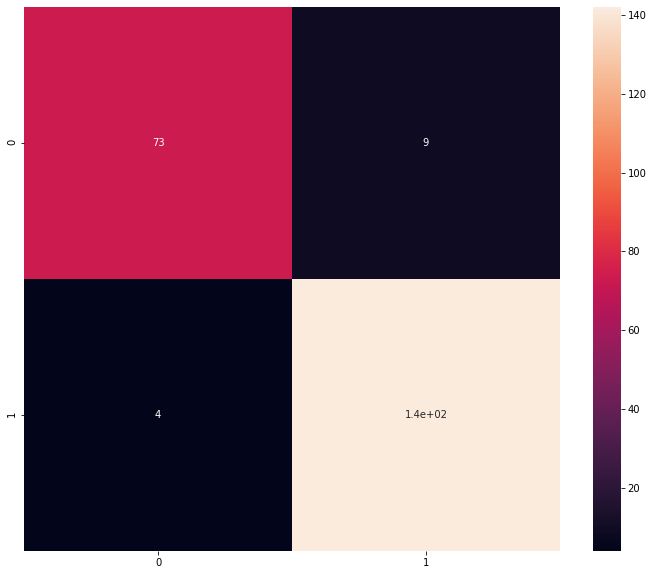

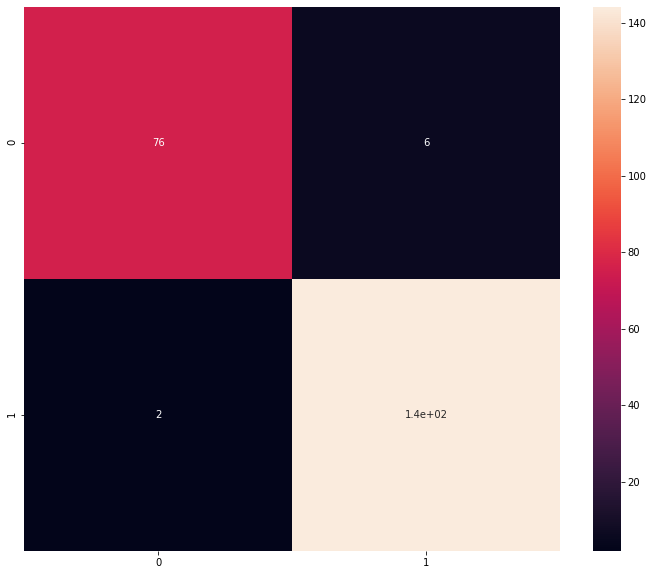

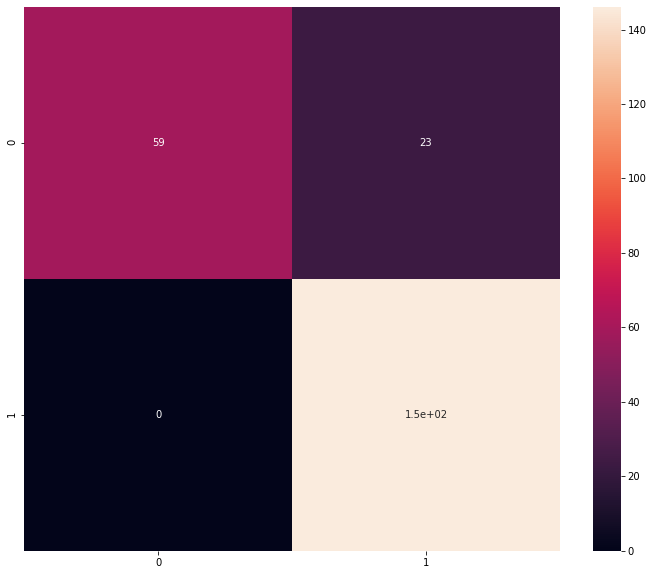

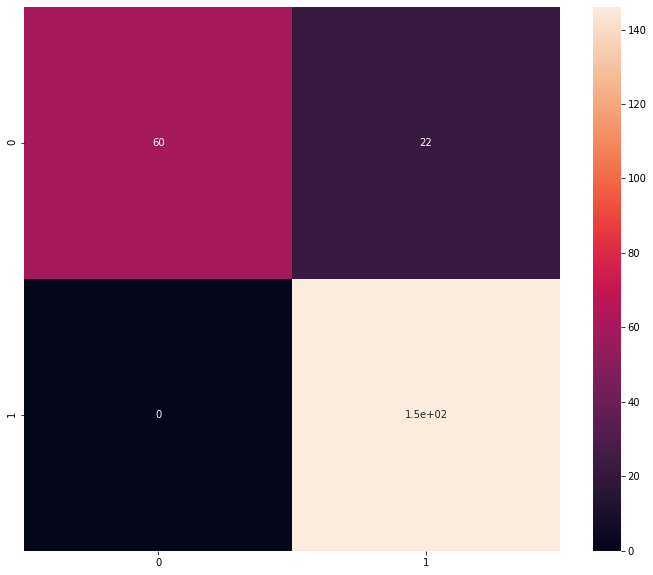

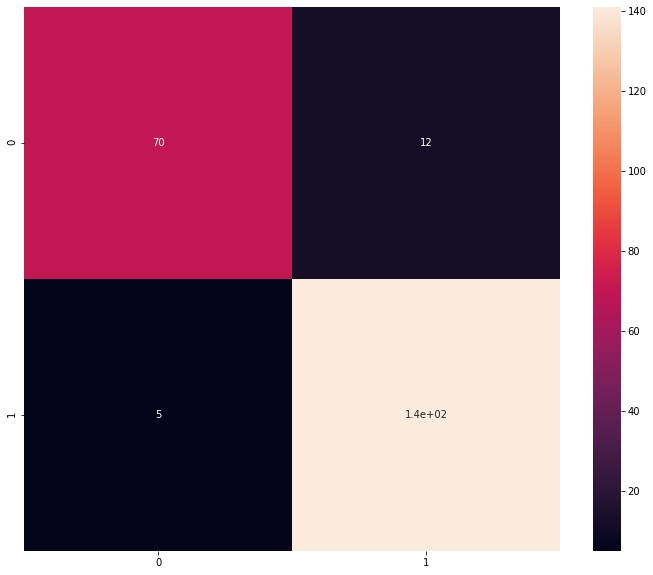

In [3]:
# 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}

# 2. 데이터를 받아서 분리해준다
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.4,
                                                   random_state = 31)

# 3. For문을 활용해서 모델을 돌려볼까요?
def run():
    result = dict()
    for model_name, model in models_list.items():
        train_model = model
        train_model.fit(X_train, y_train)
        y_pred = train_model.predict(X_test)
        
        fig, axes = plt.subplots(nrows = 1, ncols =1)
        fig.set_size_inches(12, 10)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = axes)
    
        result[model_name] = classification_report(y_test, y_pred)

    return result

# 4. 결과도 확인해보고
result = run()
print(result['DecisionTreeClassifier'])

# 2. 함수로 짜볼까?

In [1]:
# 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns


# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}

# 2. 사용할 데이터 import
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

data_list =  {'breast_cancer': load_breast_cancer(),
             'wine': load_wine(),
             'digits': load_digits()}


# 3. 함수로 만들어 보기
def run(var):
    data_set = data_list[var]
    X = data_set.data
    Y = data_set.target
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                       Y,
                                                       test_size = 0.4,
                                                       random_state = 31)
    
    
    for model_name, model in models_list.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        fig, axes = plt.subplots(nrows = 1, ncols =1)
        fig.set_size_inches(12, 10)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = axes)
    

/home/theo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


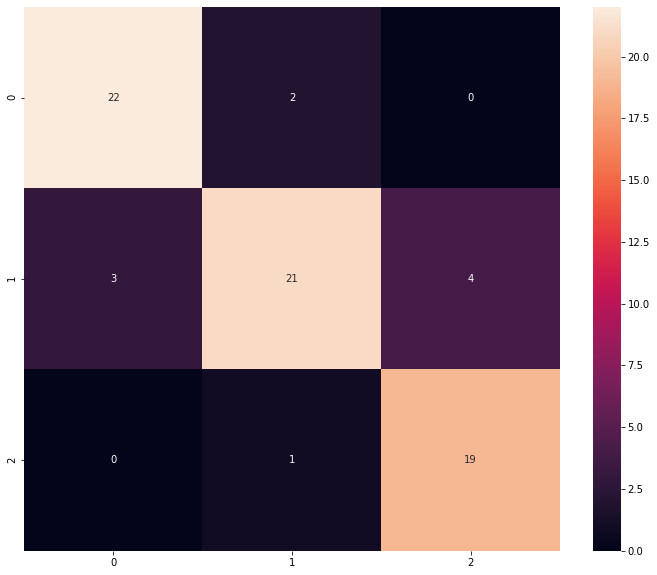

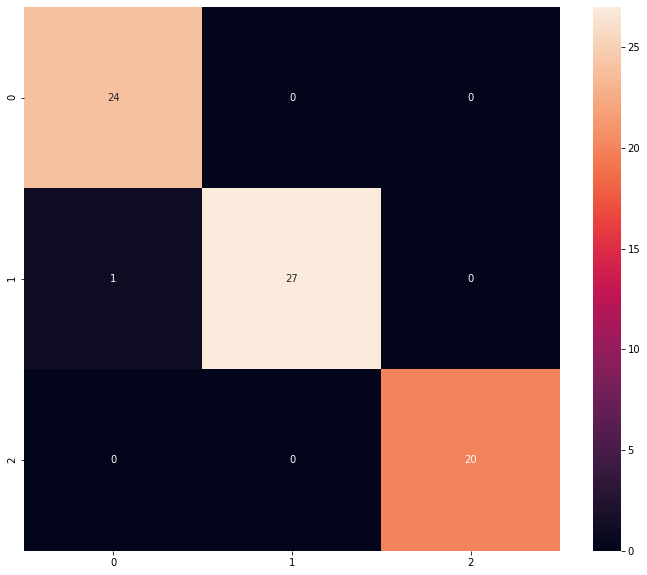

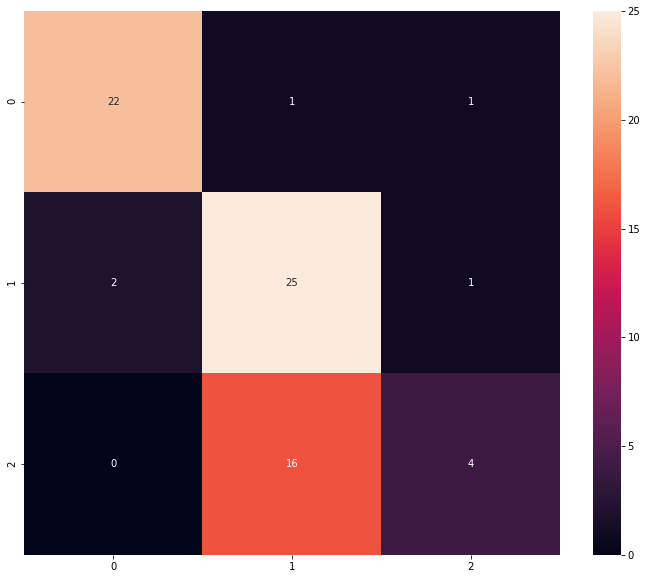

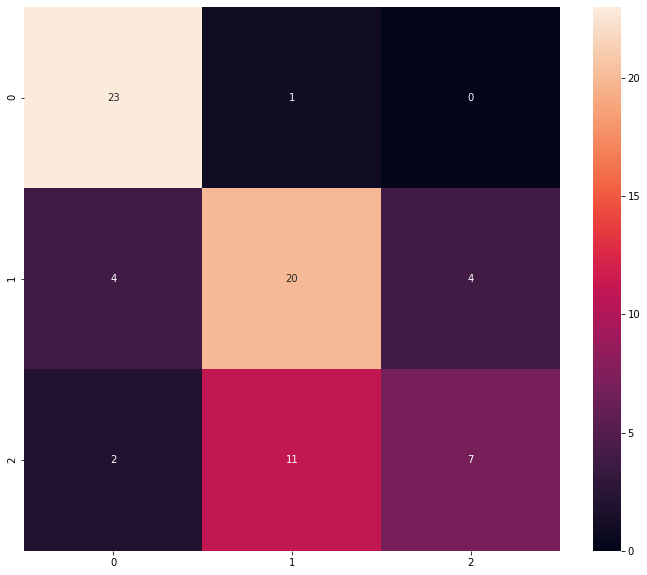

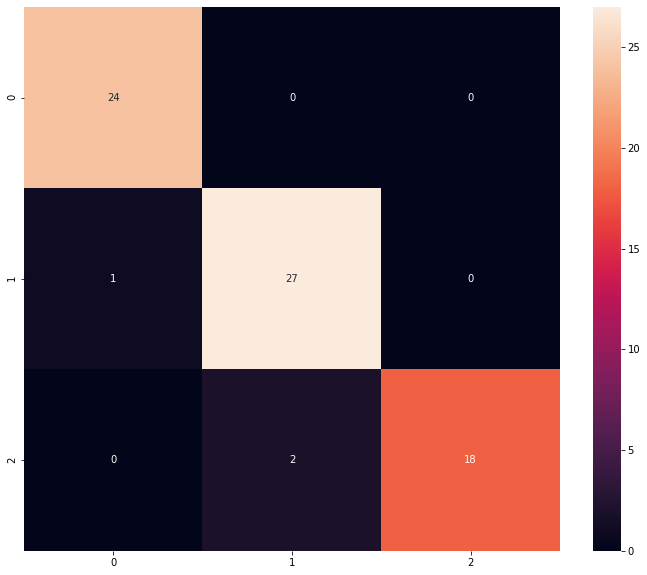

In [2]:
run('wine')

# 3. 클래스로 짜볼까?

In [11]:
# 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns


# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}

# 2. 사용할 데이터 import
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits


# 3. 클래스로 만들어 보기

class AutoML:
    
    def __init__(self, data, test_size, model):
        
        # 모델 리스트
        models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}
        
        # 데이터 리스트
        data_list =  {'breast_cancer': load_breast_cancer(),
             'wine': load_wine(),
             'digits': load_digits()}
        
        self.data = data_list[data]
        self.test_size = test_size
        self.model = models_list[model]
        
        # Feature, target 나누기
        X = self.data.data
        Y = self.data.target
        
        # train, test 데이터 나누기
        X_train, y_train, X_test, y_test = train_test_split(X,
                                                           Y,
                                                           test_size = self.test_size,
                                                           random_state = 31)
    
    def fit(self):
        self.fit = self.model.fit(X_train, y_train)
        
    def predict(self):
        self.predict = self.model.predict(X_test)
        
    def show(self, insight):
        #insight = accuracy_score, classification_report, confusion_matrix
        self.show = insight(y_test, self.predict)
        
        if insight == confusion_matrix:
            fig, axes = plt.subplots(nrows = 1, ncols =1)
            fig.set_size_inches(12, 10)
            sns.heatmap(confusion_matrix(y_test, self.predict), annot=True, ax = axes)
        else:
            print(self.show)

In [12]:
automl = AutoML(data = 'wine', test_size = 31, model = 'RandomForestClassifier')
automl.fit()
automl.predict()
automl.show(insight=confusion_matrix)

NameError: name 'X_train' is not defined

In [18]:
class AutoML:

    
    def __init__(self, data='wine', test_size=0.2):
            
        data_list = {
            'wine': load_wine,
            'breast_cancer': load_breast_cancer,
            'digits': load_digits,
            }

        models = {
            'DecisionTreeClassifier': DecisionTreeClassifier,
            'RandomForestClassifier': RandomForestClassifier,
            'SVC': SVC,
            'SGDClassifier': SGDClassifier,
            'LogisticRegression': LogisticRegression
            }
    
        self.dataset = data_list[data]()
        X, y = self.dataset.data, self.dataset.target
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        self.models, self.results = dict(), dict()
        
        
    def fit(self):
        
        for name, model in models.items():
    
            classifier = model()
            classifier.fit(self.X_train, self.y_train)
            self.models[name] = classifier
            
            
    def predict(self):
        
        for name, model in self.models.items():
            
            y_pred = model.predict(self.X_test)
            self.results[name] = {
                'accuracy_score': accuracy_score(self.y_test, y_pred),
                'classification_report': classification_report(self.y_test, y_pred),
                'confusion_matrix': confusion_matrix(self.y_test, y_pred)
            }
            
    def show(self, insight='classification_report'):
        
        for name, model in self.results.items():

            print(name)
            if insight == 'confusion_matrix':
                sns.heatmap(result[insight], annot=True)
                plt.show()

            else:
                print(result[insight])

In [19]:
automl = AutoML(data='breast_cancer')

In [20]:
automl = AutoML(data='breast_cancer')

automl.fit()
automl.predict()
automl.show(insight='confusion_matrix')

NameError: name 'models' is not defined